# Final Project - Big Data Programming 

## **Hypothesis** : Sooner or later, the world will see a Jillion job losses due to the advent of Artificial Intelligence and Robotics.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
from pandas_profiling import ProfileReport
from plotly.offline import iplot
from sklearn.cluster import KMeans
import plotly.offline as py
plt.rcParams['figure.figsize'] = 8, 5
plt.style.use("fivethirtyeight")

# Looking at the Unemployment Rates in different Countries

In [2]:
unemployment_data = pd.read_csv('../input/ilostatemployment/ilostat_original.csv',names = ['Country', 'Indicator','Survey','Gender','Age','Year','Unemployment Rate','n1','n2','n3','n4'])
unemployment_data = unemployment_data.drop(['Indicator','Survey','n1','n2','n3','n4'], axis=1) 
unemployment_data.head(5)

,Country,Gender,Age,Year,Unemployment Rate
0,Afghanistan,Sex: Total,"Age (Youth, adults): 15+",2014,7.9145
1,Afghanistan,Sex: Total,"Age (Youth, adults): 15-64",2014,7.9640
2,Afghanistan,Sex: Total,"Age (Youth, adults): 15-24",2014,9.9628
3,Afghanistan,Sex: Total,"Age (Youth, adults): 25+",2014,6.7730
4,Afghanistan,Sex: Male,"Age (Youth, adults): 15+",2014,7.1962


In [3]:
index_names = unemployment_data[ unemployment_data['Gender'] == 'Sex: Male'].index 
unemployment_data = unemployment_data.drop(index_names)

index_names = unemployment_data[ unemployment_data['Gender'] == 'Sex: Female'].index 
unemployment_data = unemployment_data.drop(index_names)

index_names = unemployment_data[ unemployment_data['Age'] == 'Age (Youth, adults): 25+'].index 
unemployment_data = unemployment_data.drop(index_names)

index_names = unemployment_data[ unemployment_data['Age'] == 'Age (Youth, adults): 15-64'].index 
unemployment_data = unemployment_data.drop(index_names)

index_names = unemployment_data[ unemployment_data['Age'] == 'Age (Youth, adults): 15-24'].index 
unemployment_data = unemployment_data.drop(index_names)

In [4]:
unemployment_data = unemployment_data.replace('Age (Youth, adults): 15+',15)

unemployment_data = unemployment_data.replace('Sex: Total',1)

unemployment_data = unemployment_data.replace('',0)

In [5]:
unemployment_data["Unemployment Rate"] = pd.to_numeric(unemployment_data["Unemployment Rate"], downcast="float")
unemployment_data["Age"] = pd.to_numeric(unemployment_data["Age"], downcast="float")
unemployment_data = unemployment_data.dropna()

In [6]:
world_bank_unemployment_data = pd.read_csv('../input/world-bank-youth-unemployment/API_ILO_country_YU.csv')
world_bank_unemployment_data.head()

,Country Name,Country Code,2010,2011,2012,2013,2014
0,Afghanistan,AFG,20.600000,20.900000,19.700001,21.100000,20.799999
1,Angola,AGO,10.800000,10.700000,10.700000,10.600000,10.500000
2,Albania,ALB,25.799999,27.000000,28.299999,28.700001,29.200001
3,Arab World,ARB,25.022214,28.117516,29.113212,29.335306,29.704569
4,United Arab Emirates,ARE,9.800000,9.800000,9.800000,9.900000,10.000000


In [7]:
# List of technologically developed countries
developed_countries = ['United States', 'Japan', 'Russian Federation', 'Israel', 'United Kingdom', 'Germany']

# List of technologically backward countries
backward_countries = ['Kenya', 'Egypt, Arab Rep.', 'Bangladesh', 'Spain', 'South Africa', 'Portugal']

In [8]:
country_list = ['Afghanistan','Angola','Albania','Argentina','Armenia','Australia' ,'Austria','Azerbaijan','Burundi','Belgium','Benin','Burkina Faso','Bangladesh','Bulgaria'
,'Bahrain','Bosnia and Herzegovina','Belarus','Belize','Bolivia','Brazil','Barbados','Brunei Darussalam'
,'Bhutan','Botswana','Central African Republic','Canada','Switzerland','Chile','China','Cameroon'
,'Congo','Colombia','Comoros','Cabo Verde','Costa Rica','Cuba','Cyprus','Czech Republic','Germany'
,'Denmark','Dominican Republic','Algeria','Ecuador','Egypt','Spain','Estonia','Ethiopia','Finland','Fiji'
,'France','Gabon','United Kingdom','Georgia','Ghana','Guinea','Greece','Guatemala','Guyana','Hong Kong'
,'Honduras','Croatia','Haiti','Hungary','Indonesia','India','Ireland','Iran','Iraq','Iceland','Israel'
,'Italy','Jamaica','Jordan','Japan','Kazakhstan','Kenya','Cambodia','Korea, Rep.','Kuwait','Lebanon','Liberia'
,'Libya','Sri Lanka','Lesotho','Lithuania','Luxembourg','Latvia','Macao','Morocco','Moldova','Madagascar'
,'Maldives','Mexico','Macedonia','Mali','Malta','Myanmar','Montenegro','Mongolia','Mozambique','Mauritania'
,'Mauritius','Malawi','Malaysia','North America','Namibia','Niger','Nigeria','Nicaragua','Netherlands'
,'Norway','Nepal','New Zealand   ','Oman','Pakistan','Panama','Peru','Philippines','Papua New Guinea'
,'Poland','Puerto Rico','Portugal','Paraguay','Qatar','Romania','Russian Federation','Rwanda','Saudi Arabia'
,'Sudan','Senegal','Singapore','Solomon Islands','Sierra Leone','El Salvador','Somalia','Serbia','Slovenia'
,'Sweden','Swaziland','Syrian Arab Republic','Chad','Togo','Thailand','Tajikistan','Turkmenistan','Timor-Leste'
,'Trinidad and Tobago','Tunisia','Turkey','Tanzania','Uganda','Ukraine','Uruguay','United States','Uzbekistan'
,'Venezuela, RB','Vietnam','Yemen, Rep.','South Africa','Congo, Dem. Rep.','Zambia','Zimbabwe'
]

In [9]:
country_clean = world_bank_unemployment_data[world_bank_unemployment_data['Country Name'].isin(country_list)]

In [10]:
metricscale1=[[0, 'rgb(102,194,165)'], [0.05, 'rgb(102,194,165)'], 
              [0.15, 'rgb(171,221,164)'], [0.2, 'rgb(230,245,152)'], 
              [0.25, 'rgb(255,255,191)'], [0.35, 'rgb(254,224,139)'], 
              [0.45, 'rgb(253,174,97)'], [0.55, 'rgb(213,62,79)'], [1.0, 'rgb(158,1,66)']]
data = [ dict(
        type = 'choropleth',
        autocolorscale = False,
        colorscale = metricscale1,
        showscale = True,
        locations = country_clean['Country Name'].values,
        z = country_clean['2010'].values,
        locationmode = 'country names',
        text = country_clean['Country Name'].values,
        marker = dict(
            line = dict(color = 'rgb(250,250,225)', width = 0.5)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = 'Unemployment\nRate')
            )
       ]

layout = dict(
    title = 'World Map of Global Youth Unemployment in the Year 2010',
    geo = dict(
        showframe = True,
        showocean = True,
        oceancolor = 'rgb(28,107,160)',
        #oceancolor = 'rgb(222,243,246)',
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 60,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = False,
                gridcolor = 'rgb(102, 102, 102)'
            ),
        lataxis = dict(
                showgrid = False,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )
fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap2010')

## Unemployment Trend in Technologically Developed Countries

In [11]:
unemployment_data_tech_developed_countries = unemployment_data.query('Country == "United States" | \
                                        Country == "Singapore" | Country == "Germany" | Country == "Japan"|\
                                        Country == "Russian Federation" | Country == "United Kingdom" | Country == "Israel"')

In [12]:
px.bar(unemployment_data_tech_developed_countries, x="Country", y="Unemployment Rate", animation_frame="Year",
           animation_group="Country", color="Country", hover_name="Country", range_y = [0,25])

In [13]:
world_bank_unemployment_data = pd.read_csv('../input/world-bank-youth-unemployment/API_ILO_country_YU.csv')

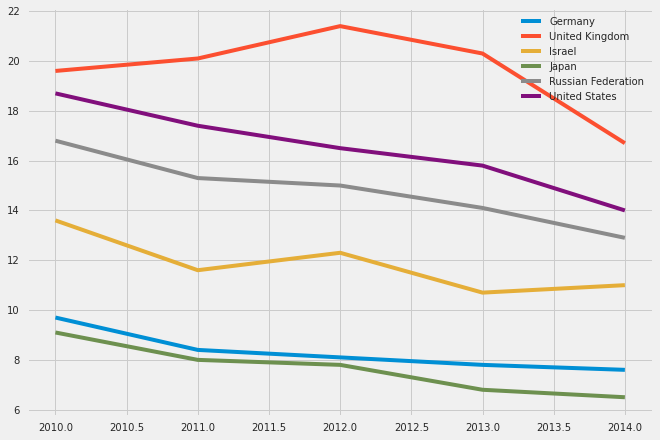

In [14]:
df = world_bank_unemployment_data[world_bank_unemployment_data['Country Name'].isin(developed_countries)].reset_index(drop=True)

plt.figure(figsize=(10,7))
for i in range(df.shape[0]):
    lst = df.iloc[i].tolist()[2:]
    plt.plot([2010,2011,2012,2013,2014], lst, label=df['Country Name'][i])
    
plt.legend()
plt.show()

## Unemployment Trend in Technologically Backward Countries

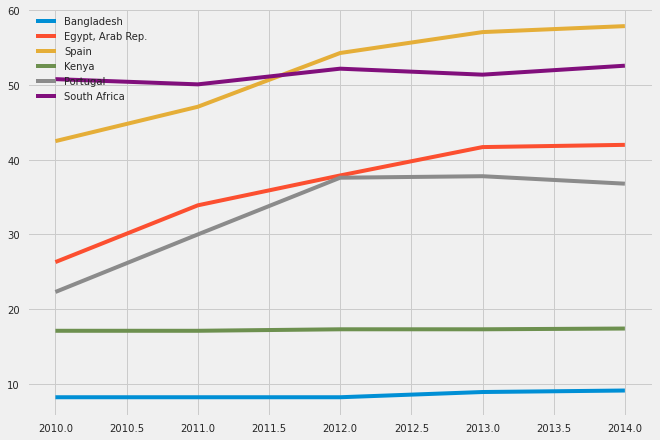

In [15]:
df = world_bank_unemployment_data[world_bank_unemployment_data['Country Name'].isin(backward_countries)].reset_index(drop=True)

plt.figure(figsize=(10,7))
for i in range(df.shape[0]):
    lst = df.iloc[i].tolist()[2:]
    plt.plot([2010,2011,2012,2013,2014], lst, label=df['Country Name'][i])
    
plt.legend()
plt.show()

> By looking at the above country-wise plots we can clearly see that in countries such as United States and Japan which had a great advancement in the use of technology over the past decade, we can see that the unemployement rate has reduced alot, whereas in technologically backward countries it either increased or remained constant.

# Analyzing OECD Employment Data between 2000 - 2019

In this section, we analyze OEC employment data between 2000 - 2019 based on different education levels. The OECD data is categorized into three education levels which are Terinary, Below Upper Secondary and Upper Secondary

In [16]:
oecd_below_upper_secondary = pd.read_csv('../input/oecdemploymentdata/oecd_below_upper_secondary_cleaned.csv')
oecd_tertiary = pd.read_csv('../input/oecdemploymentdata/oecd_tertiary_cleaned.csv')
oecd_upper_secondary = pd.read_csv('../input/oecdemploymentdata/oecd_upper_secondary_cleaned.csv')

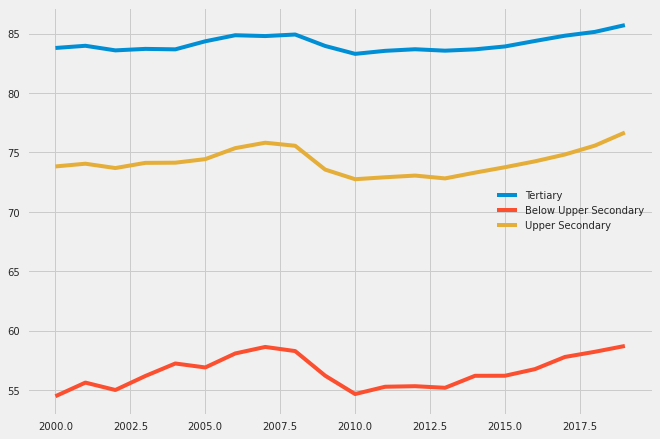

In [17]:
plt.figure(figsize=(10,7))

df = oecd_tertiary
lst = df.mean(axis = 0)
plt.plot([2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019], lst, label='Tertiary')

df = oecd_below_upper_secondary
lst = df.mean(axis = 0)
plt.plot([2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019], lst, label='Below Upper Secondary')

df = oecd_upper_secondary
lst = df.mean(axis = 0)
plt.plot([2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019], lst, label='Upper Secondary')


plt.legend()
plt.show()

As shown in the above graph, there is high correlation between the number of people employed from different education levels between 2000 and 2019. But the employement in Tertiary level increased **2.29%** (from 83.79 to 85.71), whereas employment in Below Upper Secondary and Upper Secondary sector have increased **7.76%** (from 54.49 to 58.72) and **3.89%** (from 73.82 to 76.67) respectively.

This shows that with increase in advancement in technology the rate of growth in employment increased with the level of education.

# Analyzing Skills data - PIAAC Dataset

In [18]:
piaac_data = pd.read_csv('../input/piaacdataset/piaac_cleaned.csv')
piaac_data.head()

,COUNTRY,PEOPLE,F_Q07A_YES,F_Q07A_NO,F_Q07A_SKIP,D_Q11A_NAA,D_Q11A_VL,D_Q11A_SE,D_Q11A_HE,D_Q11A_VHE,...,B_D12H_1P,B_D12H_1N,B_Q12C_Y,B_Q12C_N,B_Q12C_S,B_Q10C_N,B_Q10C_SW,B_Q10C_M,B_Q10C_V,B_Q10C_S
0,Austria,5647341,68.07,5.09,26.52,4.74,4.81,18.76,19.77,25.33,...,27.96,51.38,20.59,75.26,4.12,1.45,1.01,1.41,2.87,93.26
1,Belgium,4138042,55.10,14.59,29.92,7.68,5.91,13.45,23.13,19.78,...,28.05,53.60,26.61,68.98,4.41,1.35,0.65,0.92,2.78,94.30
2,Canada,23381067,66.92,8.41,24.31,7.22,9.80,23.36,17.61,17.53,...,0.00,0.00,33.35,62.34,4.28,4.44,2.46,2.06,6.29,84.71
3,Cyprus,592296,55.95,6.49,37.48,10.74,10.84,15.01,15.18,10.68,...,26.45,59.73,15.96,79.64,4.37,1.20,0.62,1.19,2.78,94.21
4,Czech Republic,7395111,53.31,10.79,34.20,7.47,7.20,14.10,20.00,16.35,...,29.84,50.44,34.68,58.67,5.90,1.37,0.74,1.16,2.00,94.11


In [19]:
countries = ['United States', 'Russian Federation', 'Germany', 'Sweden', 'England','Canada', 'Japan']

In [20]:
work_challenging_enough = []
for country in countries:
    work_challenging_enough.append(piaac_data.loc[piaac_data['COUNTRY'] == country].get('F_Q07A_YES').values[0])

training_activities = []
for country in countries:
    training_activities.append(piaac_data.loc[piaac_data['COUNTRY'] == country].get('B_Q12C_Y').values[0])
    
sequence_of_activities = []
for country in countries:
    sequence_of_activities.append(piaac_data.loc[piaac_data['COUNTRY'] == country].get('D_Q11A_HE').values[0] + \
                                  piaac_data.loc[piaac_data['COUNTRY'] == country].get('D_Q11A_VHE').values[0])

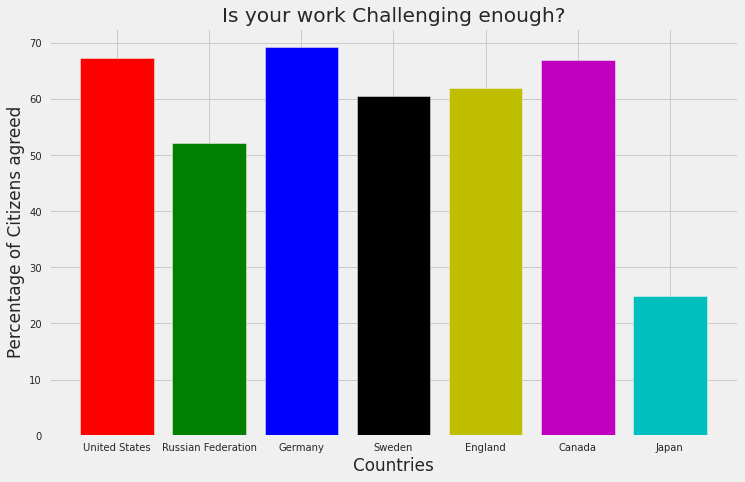

In [21]:
plt.figure(figsize=(11,7))
plt.bar(countries, work_challenging_enough,color= ['r', 'g', 'b', 'k', 'y', 'm', 'c']) 
  
plt.xlabel("Countries") 
plt.ylabel("Percentage of Citizens agreed") 
plt.title("Is your work Challenging enough?") 
plt.show() 

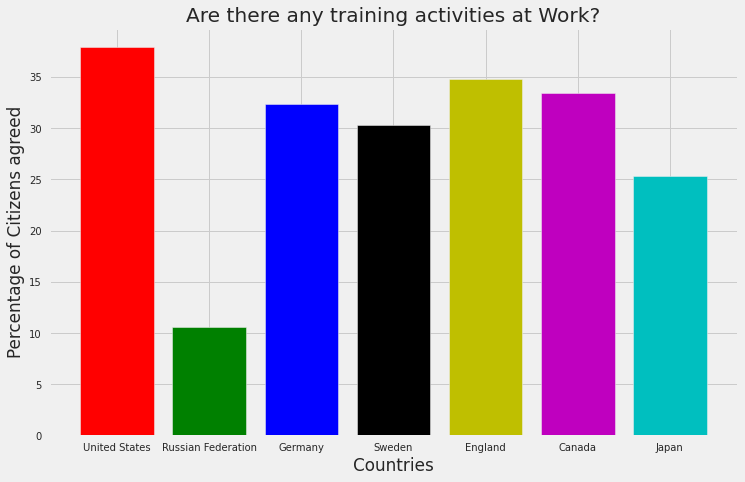

In [22]:
plt.figure(figsize=(11,7))
plt.bar(countries, training_activities,color= ['r', 'g', 'b', 'k', 'y', 'm', 'c']) 
  
plt.xlabel("Countries") 
plt.ylabel("Percentage of Citizens agreed") 
plt.title("Are there any training activities at Work?") 
plt.show() 

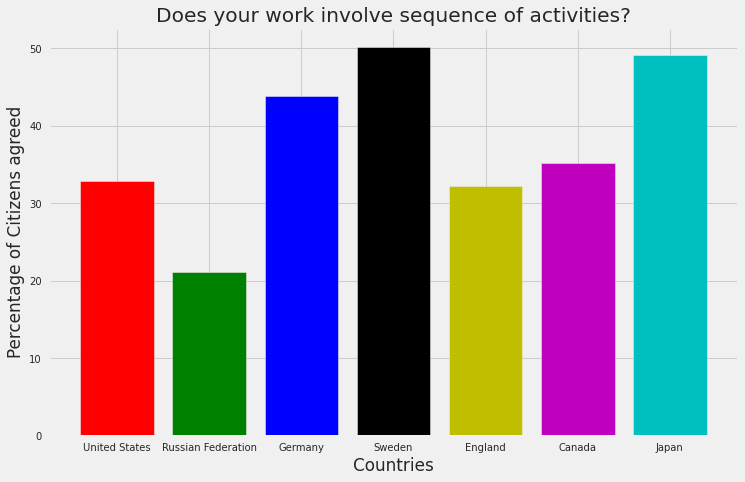

In [23]:
plt.figure(figsize=(11,7))
plt.bar(countries, sequence_of_activities,color= ['r', 'g', 'b', 'k', 'y', 'm', 'c']) 
  
plt.xlabel("Countries") 
plt.ylabel("Percentage of Citizens agreed") 
plt.title("Does your work involve sequence of activities?") 
plt.show() 